In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
#%matplotlib inline

In [2]:
df = pd.read_csv('C:/Users/DELL/Desktop/data_car.csv')

In [3]:
df.columns = df.columns.str.lower().str.replace(' ','_')

In [4]:
string_columns = list(df.dtypes[df.dtypes == 'object'].index)

In [5]:
for col in string_columns:
    df[col]=df[col].str.lower().str.replace(' ','_')

In [6]:
n = len(df)
n_val = int(n*0.2)
n_test = int(n*0.2)
n_train = int(n*0.6)    #确定总行数、用于验证、测试、训练的数据的行数


In [7]:
np.random.seed(2)
idex = np.arange(n)
np.random.shuffle(idex)    #shuffle函数随机打乱idex的顺序

df_shuffle = df.iloc[idex]    #获得无序的df


In [8]:
df_train = df_shuffle.iloc[:n_train].copy()
df_val = df_shuffle.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffle.iloc[n_train+n_val:].copy()           #创建训练集、验证集、测试集

In [9]:
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)            #设置y值，即机器学习中期待输出的值，这里采用log（price+1）的形式以消除长尾影响

del df_train['msrp']
del df_val['msrp']
del df_test['msrp']       # 删除训练集、验证集、测试集中的msrp列，防止其作为输入值影响输出

In [10]:
'''
到这里，数据准备阶段已经完成
下一步，训练建模
'''

'\n到这里，数据准备阶段已经完成\n下一步，训练建模\n'

In [11]:
def train_linear_regression(X,y):         
    ones = np.ones(X.shape[0])      
    X = np.column_stack((ones,X))        #为X数组前面加一列1，方便计算
    XTX = X.T.dot(X)   
    XTX_inv = np.linalg.inv(XTX)
    w=XTX_inv.dot(X.T).dot(y)                    #计算w向量
    return w[0],w[1:]

In [12]:
base = ['engine_hp','engine_cylinders','highway_mpg','city_mpg','popularity']


In [13]:
def class_feature(df,name,n,vector):
    global features_1
    features_1 = vector.copy()

    rank=df[name].value_counts()
    if len(rank.index)<n:
        for value in rank.index:
            feature = '%s_%s'%(name,value)
            features_1.append(feature)
            df[feature] = (df[name]==value).astype(int)
    else:
        for value in rank.index[:n]:
            feature = '%s_%s'%(name,value)
            features_1.append(feature)
            df[feature] = (df[name]==value).astype(int)


In [14]:
def prepare_X(df):     #处理分类变量——车门数量：将车门数量转化为三个特征值,并且每个特征值只有1和0两个值
    df = df.copy()
    features = base.copy()
    
    class_feature(df,'number_of_doors',3,features)

    class_feature(df,'make',5,features_1)
    
    df['age'] = 2017 - df.year
    features_1.append('age')
     
    df_num = df[features_1]
    df_num = df_num.fillna(0)
    df_num.head()
    X = df_num.values
    return X

In [15]:
def train_linear_regression_reg(X,y,r):    #正则化的线性回归，用于消除数据的噪声
    ones = np.ones(X.shape[0])      
    X = np.column_stack((ones,X))        #为X数组前面加一列1，方便计算
    
    XTX = X.T.dot(X) 
    reg = np.eye(XTX.shape[0]) * r
    XTX = XTX + reg
    XTX_inv = np.linalg.inv(XTX)
    
    w=XTX_inv.dot(X.T).dot(y)                    #计算w向量
    
    return w[0],w[1:]

In [16]:
def rmse(y,y_pred):
    dif = y-y_pred
    return np.sqrt(np.mean(np.square(dif)))

0.5074580843454007


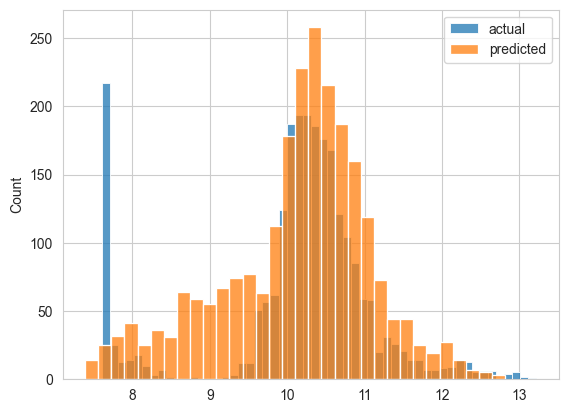

In [17]:
X_train = prepare_X(df_train)
X_val = prepare_X(df_val)
r= 0.001
w_0, w = train_linear_regression_reg(X_train,y_train,r=r)
y_pred = w_0+X_val.dot(w)
rmse_val = rmse(y_val,y_pred)

print(rmse_val)
sns.histplot(y_val,label='actual')
sns.histplot(y_pred,label='predicted')
plt.legend()